In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../price.csv',index_col=['stock_id','date'],parse_dates=['date'])


In [2]:
df = df.rename(columns={
    '開盤價':'open',
    '最高價':'high',
    '最低價':'low',
    '收盤價':'close',
    '成交金額':'volume'
})
df = df[['open','high','low','close','volume']]
df = df.loc[df['volume']>0]
df = df.apply(pd.to_numeric,errors='coerce')
df = df.loc['2330']
df

,open,high,low,close,volume
date,,,,,
2007-01-02,67.8,68.0,67.3,67.7,1768131919
2007-01-03,67.8,68.7,67.5,68.0,2875024398
2007-01-04,67.7,68.1,67.6,67.7,1514454033
2007-01-05,67.5,67.7,66.5,66.9,2048997239
2007-01-08,66.1,66.5,65.7,65.8,1595029837
...,...,...,...,...,...
2024-11-04,1030.0,1045.0,1025.0,1040.0,29263376605
2024-11-05,1030.0,1055.0,1030.0,1050.0,34851674542
2024-11-06,1050.0,1080.0,1040.0,1060.0,63110184620


C:\Users\Oscar\AppData\Local\Temp\ipykernel_23212\1587446169.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ -0.5   1.4   0.    1.6  -0.1   1.    0.1   1.7  -0.9   2.9  -0.5   1.
   0.5  -0.5  -1.3   0.5  -1.    0.5  -0.5  -0.1   0.3   0.    0.    0.2
  -0.1   1.6   1.5   0.    0.2   3.1  -1.6   0.   -1.3   3.3   6.5  -7.5
   0.   28.   -4.5  15.   -6.   11.   15.    6.   -2.5  14.    3.   -1.5
  -2.   38.   -5.    5.   -3.   -3.  -10.    2.   17.    4.   -7.   -1.
  -1.   -2.   39.    9.   -9.    6.   17.   21.  -11.   -5.   14.    6.
  -3.   22.   -3.    1.    5.   33.   18.    6.   13.    2.  -17.   41.
  -5. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[condition,'earn']= df['open'].shift(-2) - df['open'].shift(-1)


<Axes: xlabel='date'>

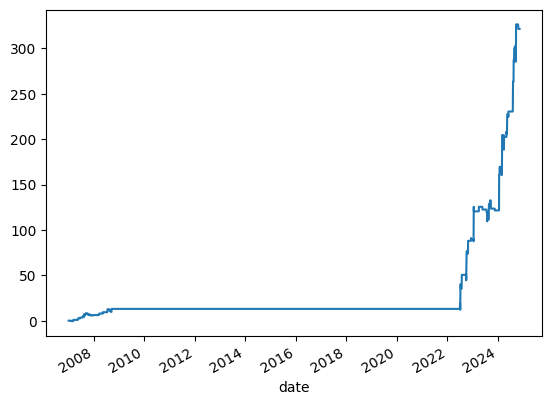

In [3]:
condition = (df['close'].shift(2)-df['open'].shift(2)<0) & (df['close'].shift(1)-df['open'].shift(1)<0) & (df['close']-df['open']<0)
df['earn']=0
df.loc[condition,'earn']= df['open'].shift(-2) - df['open'].shift(-1)
df['earn'].cumsum().plot()

In [4]:
import pyfolio as pf

C:\Users\Oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [5]:
pf.create_returns_tear_sheet(df['earn']/df['open'].shift(-1))

C:\Users\Oscar\AppData\Local\Programs\Python\Python310\lib\site-packages\empyrical\stats.py:1527: RuntimeWarning: invalid value encountered in double_scalars
  return np.abs(np.percentile(returns, 95)) / \


AttributeError: 'Series' object has no attribute 'iteritems'